# Example 2 - Plotting data files

## About this example: Load a data file and make a simple plot

In Example 1, we learned how nextnanopy can modify and run the input files. In this Example, we illustrate the nextnanopy postprocessing - visualization of simulation output data. 

Nextnanopy is designed to offer the most user-friendly way to load all the information stored in any data file generated by nextnano products (nextnano++, nextnano³, nextnano.NEGF and nextnano.MSB). There is no need for the user to know how the raw data is structured in the different data files in the simulation output.

Note: Not all the data file formats have been implemented yet. If you encounter any issue, please contact python@nextnano.com.

## How to load a data file?

The simplest way is to use a universal class, ```nextnanopy.DataFile```:

```python
datafile = nextnanopy.DataFile(path_to_file, product='nextnano++')
```

This object contains all the relevant information of the data file:
- coordinates (or independent variables) like x, y, z position
- variables (or dependent variables) like bandedges, electric field, density of electrons, energy levels, etc
- product (str): nextnano++, nextnano3, nextnano.NEGF or nextnano.MSB

In the case shown above, ```datafile``` was created by specifying ```product = 'nextnano++'```. This helps the class to look for the best loading routine for files generated by nextnano++. 

It will detect the dimension of the simulation (1D, 2D, 3D) and the file format (.dat, .fld, .txt).

In [ ]:
import nextnanopy as nn

datafile_1d = nn.DataFile('bandedges_1d.dat', product='nextnano++') # 1D .dat file
datafile_2d = nn.DataFile('bandedges_2d.fld', product='nextnano++') # 2D .fld file

The data ```bandedges_1d.dat``` contains one coordinate (x) and several variables (gamma bandedge, electron Fermi level, hole Fermi level, etc). The data structure is a set of columns with a tabulator as delimiter.

On the other hand, ```bandedges_2d.fld``` contains two coordinates (x and y) and also several variables. Moreover, the raw data structure is totally different from ```bandedges_1d.dat```. 

A single class of nextnanopy, ```nextnanopy.Datafile```, can nevertheless load the information regardless of the data formats.


*Remark: You can omit the argument ```product```. In this case, it will try to detect automatically the nextnano product (nextnano++, nextnano3, nextnano.NEGF or nextnano.MSB), and then look for the best loading routine. This can be dangerous since it is not garanteed that the loaded data is correct. So, we recommend to always specify ```product```.*

## Example of a 1D nextnano++ simulation

In [1]:
import nextnanopy as nn

datafile_1d = nn.DataFile(r'..\..\tests\datafiles\nextnano++\bandedges_1d.dat',product='nextnano++')
print(datafile_1d)

DataFile
fullpath: ..\..\tests\datafiles\nextnano++\bandedges_1d.dat
Coordinates: 1 datasets
	name: x - unit: nm - shape: (548,) - dim: 0
Variables: 4 datasets
	name: Gamma - unit: eV - shape: (548,)
	name: HH - unit: eV - shape: (548,)
	name: electron_Fermi_level - unit: eV - shape: (548,)
	name: hole_Fermi_level - unit: eV - shape: (548,)


# Preview plot DataFile.plot()


_This feature is available from the version 0.1.11 and with matplotlib package installed._

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x[nm]', ylabel='Energy[eV]'>)

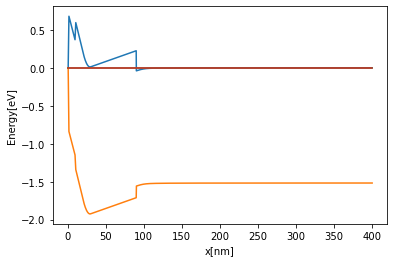

In [2]:
datafile_1d.plot(y_axis_name = 'Energy')

This feature is only recommended to make a simple preview of the data. It is highly recommended to read the tutorial below if you want to have access the data arrays, fine-tune the plot and/or use graphs in reports/publications

## How to access the coordinates?

You can access the coordinates in ```datafile.coords```. It returns a dictionary of ```Coord``` objects.

```Coord``` objects contains the following information:
- name (str)
- value (numpy.array)
- unit (str)
- dim (int)
- label (str, optional)
- metadata (dict, if there is any)

Each information is an attribute. For example, if you want to get the unit of a coordinate,

```python
datafile.coords['x'].unit
```

There are several methods to access each coordinate

```python
datafile.get_coord(name) # method 1 (recommended)
datafile.coords[name] # method 2 (recommended)
datafile[name] # method 3 (recommended)
datafile.coords[index] # method 4
```

In [3]:
print(f"List of coordinates in the current datafile")
print(datafile_1d.coords)

List of coordinates in the current datafile
DictList([
(index: 0 - key: 'x' - name: x - unit: nm - shape: (548,) - dim: 0)
])


In [4]:
x = datafile_1d.coords['x']
print(f"coord 'x' - name: {x.name}")
print(f"coord 'x' - value (shape): {x.value.shape}")
print(f"coord 'x' - unit: {x.unit}")
print(f"coord 'x' - dim: {x.dim}")
print(f"coord 'x' - label: {x.label}")
print(f"coord 'x' - metadata: {x.metadata}")

coord 'x' - name: x
coord 'x' - value (shape): (548,)
coord 'x' - unit: nm
coord 'x' - dim: 0
coord 'x' - label: x (nm)
coord 'x' - metadata: {}


In [ ]:
print(f"coord 'x' - value:")
print(x.value)

## How to access the variables?

Similarly, you can access the dependent variables in ```datafile.variables```. It returns a dictionary of ```Variables``` objects.

```Variables``` objects contains the following information:
- name (str)
- value (np.array)
- unit (str)
- label (str, optional)
- metadata (dict, if there is any)

As for ```Coords```, each information is an attribute. For example, if you want to get the unit,

```python
datafile.variables['Gamma'].unit
```

There are several methods to access each coordinate

```python
datafile.get_variable(name) # method 1 (recommended)
datafile.variables[name] # method 2 (recommended)
datafile[name] # method 3 (recommended)
datafile.variables[index] # method 4
```

In [6]:
print(f"List of variables in the current datafile")
print(datafile_1d.variables)

List of variables in the current datafile
DictList([
(index: 0 - key: 'Gamma' - name: Gamma - unit: eV - shape: (548,)),
(index: 1 - key: 'HH' - name: HH - unit: eV - shape: (548,)),
(index: 2 - key: 'electron_Fermi_level' - name: electron_Fermi_level - unit: eV - shape: (548,)),
(index: 3 - key: 'hole_Fermi_level' - name: hole_Fermi_level - unit: eV - shape: (548,))
])


In [7]:
key = 'Gamma'
var = datafile_1d.variables[key]
print(f"variables '{key}' - name: {var.name}")
print(f"variables '{key}' - value (shape): {var.value.shape}")
print(f"variables '{key}' - unit: {var.unit}")
print(f"variables '{key}' - label: {var.label}")
print(f"variables '{key}' - metadata: {var.metadata}")

variables 'Gamma' - name: Gamma
variables 'Gamma' - value (shape): (548,)
variables 'Gamma' - unit: eV
variables 'Gamma' - label: Gamma (eV)
variables 'Gamma' - metadata: {}


In [ ]:
print(f"variables '{key}' - value:")
print(var.value)

## Simple plot

As an example, we plot together the gamma band and the electron Fermi level. This example deals with the simulation output of a GaAs heterostructure.

For this example, we will you ```matplotlib```, but you can use any other package!

<IPython.core.display.Javascript object>


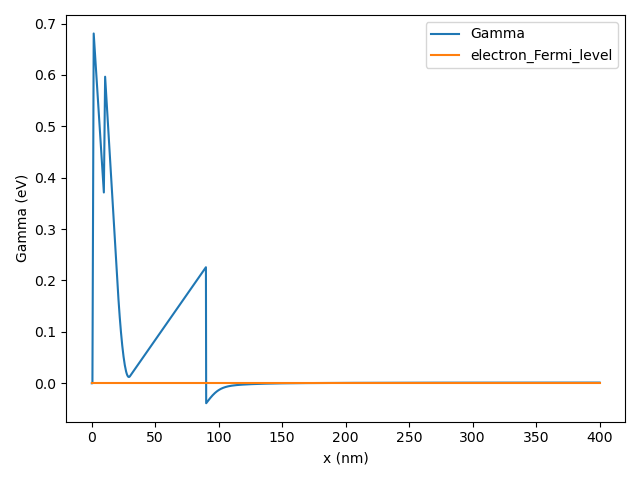

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook   # comment out if you run from Spyder

fig, ax = plt.subplots(1)
x = datafile_1d.coords['x']
gamma = datafile_1d.variables['Gamma']
efermi = datafile_1d.variables['electron_Fermi_level']

ax.plot(x.value,gamma.value, label=gamma.name)
ax.plot(x.value,efermi.value, label=efermi.name)

ax.set_xlabel(x.label)
ax.set_ylabel(gamma.label)
ax.legend()
fig.tight_layout()

## Example of data file from a 2D simulation

By using the same methods, we can access the coordinates and the variables of a totally different data file.

Here, the data also corresponds to a GaAs heterostructure, but now we will plot the gamma bandedge in the x and the y directions.

In [10]:
datafile_2d = nn.DataFile(r'..\..\tests\datafiles\nextnano++\bandedges_2d.fld',product='nextnano++')

Now there will be two coordinates: x and y.

In [11]:
print(f"List of coordinates in the current datafile: {datafile_2d.coords}")

List of coordinates in the current datafile: DictList([
(index: 0 - key: 'x' - name: x - unit: nm - shape: (164,) - dim: 0),
(index: 1 - key: 'y' - name: y - unit: nm - shape: (79,) - dim: 1)
])


Variables can be accessed by the same method.

In [12]:
print(f"List of variables in the current datafile: {datafile_2d.variables}")

List of variables in the current datafile: DictList([
(index: 0 - key: 'Gamma' - name: Gamma - unit: eV - shape: (164, 79)),
(index: 1 - key: 'electron_Fermi_level' - name: electron_Fermi_level - unit: eV - shape: (164, 79))
])


You can verify that the number of points are correct.

In [13]:
print(f"coord 'x' - value (shape): {datafile_2d.coords['x'].value.shape}")
print(f"coord 'y' - value (shape): {datafile_2d.coords['y'].value.shape}")
print(f"variables 'Gamma' - value (shape): {datafile_2d.variables['Gamma'].value.shape}")

coord 'x' - value (shape): (164,)
coord 'y' - value (shape): (79,)
variables 'Gamma' - value (shape): (164, 79)


Let's make a simple color map!

<IPython.core.display.Javascript object>


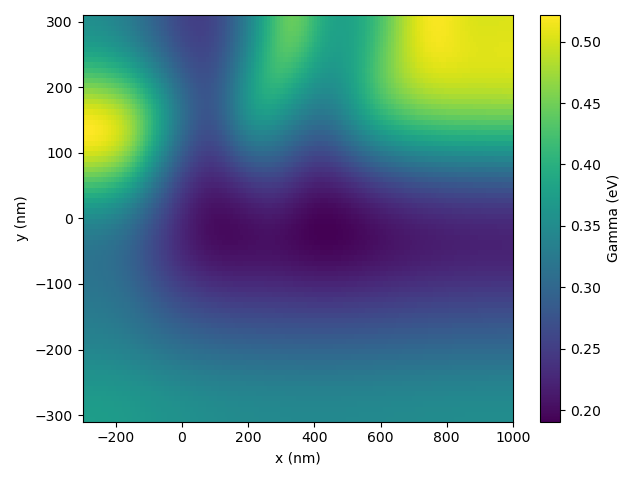

<ipython-input-14-bf255cc48aff>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolor = ax.pcolormesh(x.value,y.value,z.value.T)


In [14]:
x=datafile_2d.coords['x']
y=datafile_2d.coords['y']
z=datafile_2d.variables['Gamma']

fig, ax = plt.subplots(1)
pcolor = ax.pcolormesh(x.value, y.value, z.value.T)
cbar = fig.colorbar(pcolor)
cbar.set_label(z.label)

ax.set_xlabel(x.label)
ax.set_ylabel(y.label)

fig.tight_layout()



Please contact python@nextnano.com for any issues with this document.